# Calculating trace element evolution during mantle melting. 
- This notebook shows how to use the mantle melting model of Lee et al. (2012) adapted by Wieser et al. (2020) to model how S, Cu and other chalcophile or lithophile elements evolve during mantle melting
- For more information on how the math works, we direct you towards the supporting information of Wieser et al (2020) - https://doi.org/10.1016/j.gca.2020.05.018 - Where the equations are typed out in detail

## Loading libraries

In [2]:
#!pip install PySulfSat

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PySulfSat as ss
ss.__version__

'1.0.4'

## Lets model a really incompatible element like Barium First

In [4]:
# Set up your mantle mineralogy at the start of melting
Modes=pd.DataFrame(data={'ol': 0.6, 'opx': 0.2, 
       'cpx': 0.18, 'sp': 0.02, 'gt': 0}, index=[0])

# Enter how much Ba is in the mantle source prior to melting

In [5]:
# Set up your partition coefficients
KDs_Ba=pd.DataFrame(data={'element': 'Ba',
'ol': 0.000005, 'opx': 0.000006, 
'cpx': 0.0004, 'sp': 0.223, 'gt': 0.00007, 'sulf': 0 }, index=[0])


In [6]:
help(ss.Lee_Wieser_sulfide_melting)

Help on function Lee_Wieser_sulfide_melting in module PySulfSat.mantle_melting:

Lee_Wieser_sulfide_melting(*, M_Max=0.01, Modes, KDs, N=3001, F=None, S_Sulf=363636, elem_Per=30, S_Mantle=200, S_Melt_SCSS_2_ppm=980.7872088, Prop_S6=0)
    Function for calculating trajectory of S during mantle melting,
    adapted from the Excel workbook of Lee et al. (2012) and the Python code
    of Wieser et al. (2020)
    
    Parameters
    -----------
    N: int
        Number of iterative steps for melting.
    
    Either
    
    M_Max: float
        Amount of peridotite left at final step. E.g. M_Max=0.7
        calculates 0-30% melting (F=1-M)
    
    F: np.array
        F you want
    
    Modes: Pandas.Dataframe
        Dataframe of ol-opx-cpx-sp modes, with column headings 'ol',
        'opx', 'cpx', 'sp'
        (can be 1 row or multiple for each step of melting, in which case N is adjusted to be length of this dataframe)
    
    KDs: pandas.DataFrame
        Dataframe of KD values. Can

In [7]:
df_Ba_200S=ss.Lee_Wieser_sulfide_melting(N=3000,
                        M_Max=0.8, 
                        Modes=Modes,
                        KDs=KDs_Ba,
                        S_Sulf=32*10**4, elem_Per=6.85,
                        S_Mantle=200,
                        S_Melt_SCSS_2_ppm=1000,
                         Prop_S6=0)
df_Ba_200S.head()
# Lets get rid of the first step
df_Ba_200S=df_Ba_200S.iloc[1:-1, :]
df_Ba_200S.head()

,F,M,Ba_KD,Ba_Melt_Agg,Ba_Melt_Inst,Ba_Residue,S_Residue,S_Melt_Inst,S_Melt_Agg,S_Melt_input,XSulf
1,0.000067,0.999933,0.004533,1489.210718,1489.210718,6.751136,199.946645,1000.0,1000.0,1000.0,0.000625
2,0.000133,0.999867,0.004533,1478.463269,1467.715820,6.653693,199.893284,1000.0,1000.0,1000.0,0.000625
3,0.000200,0.999800,0.004533,1467.818774,1446.529785,6.557650,199.839915,1000.0,1000.0,1000.0,0.000624
4,0.000267,0.999733,0.004533,1457.276129,1425.648194,6.462987,199.786539,1000.0,1000.0,1000.0,0.000624
5,0.000333,0.999667,0.004533,1446.834242,1405.066693,6.369685,199.733155,1000.0,1000.0,1000.0,0.000624


## Now inspect what happens to Ba in the residual mantle vs the Aggregated melt

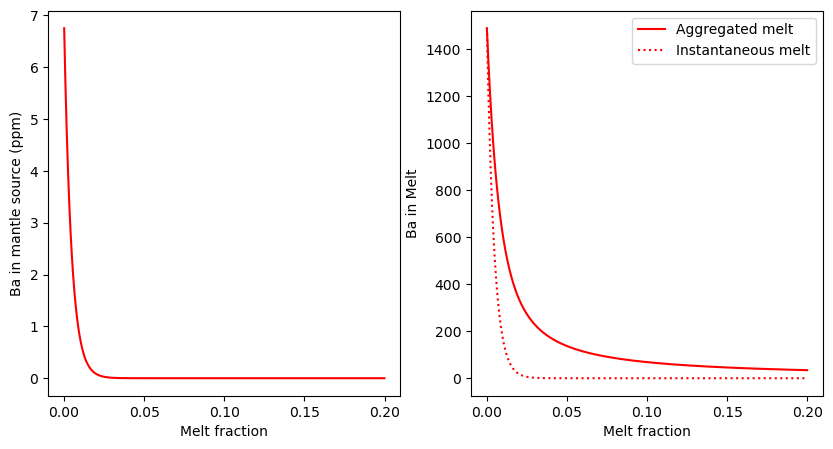

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Ba_200S['F'], df_Ba_200S['Ba_Residue'], '-r')
ax2.plot(df_Ba_200S['F'], df_Ba_200S['Ba_Melt_Agg'], '-r', label='Aggregated melt')
ax2.plot(df_Ba_200S['F'], df_Ba_200S['Ba_Melt_Inst'], ':r', label='Instantaneous melt')
ax1.set_xlabel('Melt fraction')
ax1.set_ylabel('Ba in mantle source (ppm)')
ax2.set_xlabel('Melt fraction')
ax2.set_ylabel('Ba in Melt')
ax2.legend()

## Questions to think about
1. What is happening to Ba in the mantle source? 
2. Why is Ba in the instantanous melt vs. aggregated melt so different

### Now try running a less compatible element, like Cu

In [15]:

KDs_Cu=pd.DataFrame(data={'element': 'Cu',
        'ol': 0.048, 'opx': 0.034, 
        'cpx': 0.043, 'sp': 0.223, 
        'gt': 0, 'sulf': 0}, index=[0])

S_Sulf = 33*(10**4)
df_Cu_200S=ss.Lee_Wieser_sulfide_melting(Modes=Modes, KDs=KDs_Cu,
                                          M_Max=0.5, 
                        N=3000, S_Mantle=200,
                        S_Sulf=S_Sulf, S_Melt_SCSS_2_ppm=1000,
                        elem_Per=30, Prop_S6=0)

# Lets get rid of the first step
df_Cu_200S=df_Cu_200S.iloc[1:-1, :]
df_Cu_200S.head()

,F,M,Cu_KD,Cu_Melt_Agg,Cu_Melt_Inst,Cu_Residue,S_Residue,S_Melt_Inst,S_Melt_Agg,S_Melt_input,XSulf
1,0.000167,0.999833,0.047771,625.915368,625.915368,29.900631,199.866600,1000.0,1000.0,1000.0,0.000606
2,0.000333,0.999667,0.047771,624.878461,623.841554,29.801575,199.733155,1000.0,1000.0,1000.0,0.000605
3,0.000500,0.999500,0.047771,623.843730,621.774269,29.702830,199.599666,1000.0,1000.0,1000.0,0.000605
4,0.000667,0.999333,0.047771,622.811171,619.713492,29.604397,199.466133,1000.0,1000.0,1000.0,0.000604
5,0.000834,0.999166,0.047771,621.780778,617.659205,29.506273,199.332555,1000.0,1000.0,1000.0,0.000604


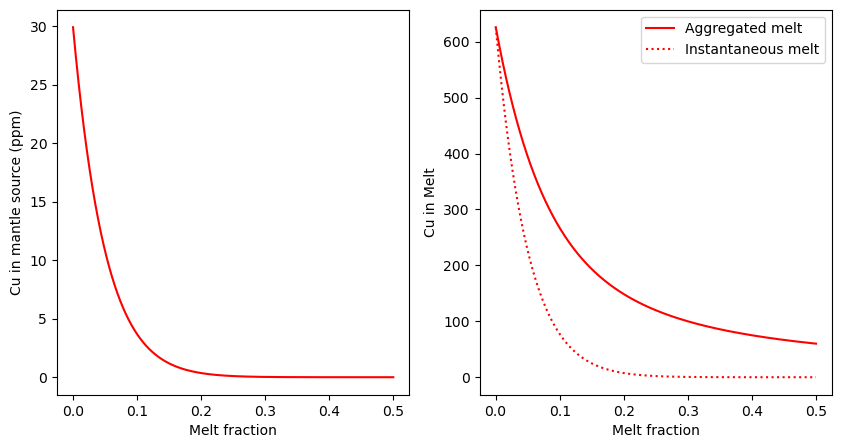

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Cu_200S['F'], df_Cu_200S['Cu_Residue'], '-r')
ax2.plot(df_Cu_200S['F'], df_Cu_200S['Cu_Melt_Agg'], '-r', label='Aggregated melt')
ax2.plot(df_Cu_200S['F'], df_Cu_200S['Cu_Melt_Inst'], ':r', label='Instantaneous melt')
ax1.set_xlabel('Melt fraction')
ax1.set_ylabel('Cu in mantle source (ppm)')
ax2.set_xlabel('Melt fraction')
ax2.set_ylabel('Cu in Melt')
ax2.legend()

## but this isnt realistic, mantle sulfides actually have a partition coefficient of Cu of around 800.... Try adjusting this in the Kds above...

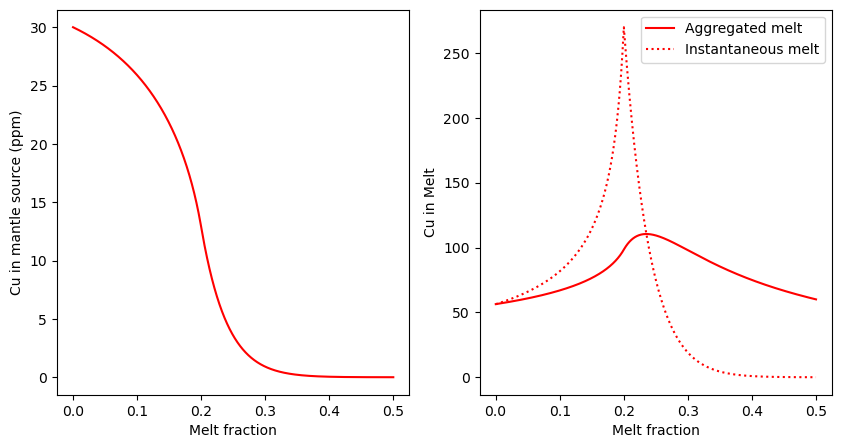

In [17]:

KDs_Cu=pd.DataFrame(data={'element': 'Cu',
        'ol': 0.048, 'opx': 0.034, 
        'cpx': 0.043, 'sp': 0.223, 
        'gt': 0, 'sulf': 800}, index=[0])

S_Sulf = 33*(10**4)
df_Cu_200S=ss.Lee_Wieser_sulfide_melting(Modes=Modes, KDs=KDs_Cu,
                                          M_Max=0.5, 
                        N=3000, S_Mantle=200,
                        S_Sulf=S_Sulf, S_Melt_SCSS_2_ppm=1000,
                        elem_Per=30, Prop_S6=0)

# Lets get rid of the first step
df_Cu_200S=df_Cu_200S.iloc[1:-1, :]
df_Cu_200S.head()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Cu_200S['F'], df_Cu_200S['Cu_Residue'], '-r')
ax2.plot(df_Cu_200S['F'], df_Cu_200S['Cu_Melt_Agg'], '-r', label='Aggregated melt')
ax2.plot(df_Cu_200S['F'], df_Cu_200S['Cu_Melt_Inst'], ':r', label='Instantaneous melt')
ax1.set_xlabel('Melt fraction')
ax1.set_ylabel('Cu in mantle source (ppm)')
ax2.set_xlabel('Melt fraction')
ax2.set_ylabel('Cu in Melt')
ax2.legend()

## Do silicate modes actually stay constant during mantle melting?

In [11]:
# Lets look at the outputs of a ThermoCalc model to test!


In [19]:
df=pd.read_excel('MantleMelting.xlsx')
df.head()

,Unnamed: 0,spn,opx,g,liq,cpx,ol,T_C,P_bar
0,0,0.0,0.090892,0.117303,0.0,0.171971,0.619834,1378.998934,30000.000000
1,1,0.0,0.091611,0.115715,0.0,0.172833,0.619839,1378.445890,29666.666667
2,2,0.0,0.092373,0.114066,0.0,0.173713,0.619849,1377.878224,29333.333333
3,3,0.0,0.093180,0.112346,0.0,0.174618,0.619854,1377.321079,29000.000000
4,4,0.0,0.094035,0.110557,0.0,0.175543,0.619861,1376.756734,28666.666667


(30.0, 0.0)

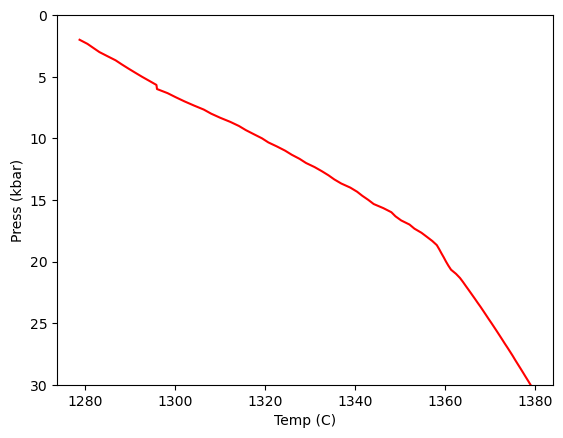

In [25]:
plt.plot(df['T_C'], df['P_bar']/1000, '-r')
plt.xlabel('Temp (C)')
plt.ylabel('Press (kbar)')
plt.ylim([30, 0])

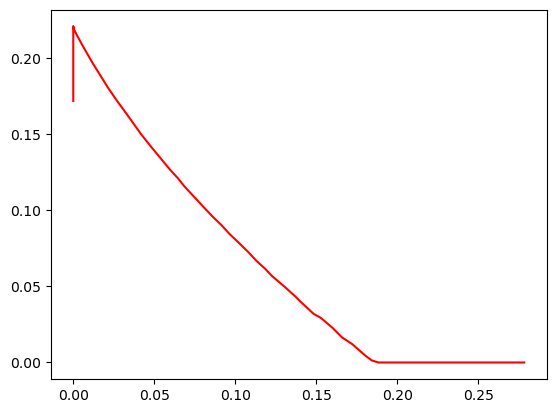

In [27]:
plt.plot(df['liq'], df['cpx'], '-r')
# Add other minerals here